In [20]:

import numpy as np


class LinearRegression:
    # error is calcualated using MSE
    # to get minimum MSE, use gradient descent
    def __init__(self, lr = 0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape # getting the number features in dataset
        self.weights = np.zeros(n_features) # initializing weights to the number of features
        self.bias = 0 # initializing bias to 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights + self.bias) # predicting the results

            dw = (1/n_samples)*np.dot(X.T,(y_pred-y)) # calculating the derivatives for weight and bias
            db = (1/n_samples)*np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw # updating weights and bias
            self.bias = self.bias - self.lr * db


    def predict(self, X):
        y_pred = np.dot(X, self.weights + self.bias) # predicting the results
        return y_pred



Mean Squared Error:  306.0378628194029


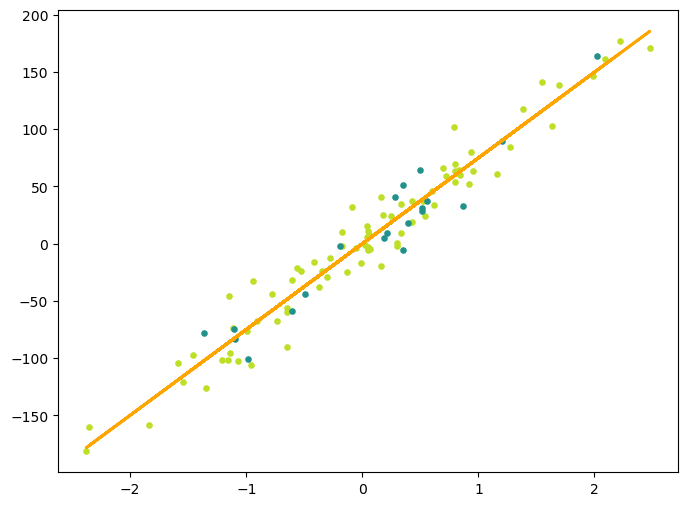

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#data = pd.read_csv('https://www.kaggle.com/CooperUnion/cardataset')

data = datasets.load_diabetes()
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

reg = LinearRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print('Mean Squared Error: ',mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=14)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=14)
plt.plot(X, y_pred_line, color='orange', linewidth=2, label='Prediction')
#plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

